In [1]:
def get_data(split_sequences=False):

    X = []
    y = []
    currentX = []
    currentY = []
    for line in open('train.txt'):
        line = line.rstrip()
        if line:
            r = line.split()
            word, tag, _ = r
            currentX.append(word)
            currentY.append(tag)
        elif split_sequences:
            X.append(currentX)
            y.append(currentY)
            currentX = []
            currentY = []

    currentX = []
    currentY = []
    for line in open('test.txt'):
        line = line.rstrip()
        if line:
            r = line.split()
            word, tag, _ = r
            currentX.append(word)
            currentY.append(tag)
        elif split_sequences:
            X.append(currentX)
            y.append(currentY)
            currentX = []
            currentY = []

    return X, y

In [2]:
Xdata,ydata = get_data(split_sequences=True)

In [3]:
" ".join(Xdata[0])

"Confidence in the pound is widely expected to take another sharp dive if trade figures for September , due for release tomorrow , fail to show a substantial improvement from July and August 's near-record deficits ."

In [4]:
" ".join(ydata[0])

'NN IN DT NN VBZ RB VBN TO VB DT JJ NN IN NN NNS IN NNP , JJ IN NN NN , VB TO VB DT JJ NN IN NNP CC NNP POS JJ NNS .'

In [5]:
for x,y in [(Xdata,ydata)]:
    for i in range(0,37):
        print(f"{Xdata[0][i]} : {ydata[0][i]}")

Confidence : NN
in : IN
the : DT
pound : NN
is : VBZ
widely : RB
expected : VBN
to : TO
take : VB
another : DT
sharp : JJ
dive : NN
if : IN
trade : NN
figures : NNS
for : IN
September : NNP
, : ,
due : JJ
for : IN
release : NN
tomorrow : NN
, : ,
fail : VB
to : TO
show : VB
a : DT
substantial : JJ
improvement : NN
from : IN
July : NNP
and : CC
August : NNP
's : POS
near-record : JJ
deficits : NNS
. : .


In [6]:
classes = [item for sublist in ydata for item in sublist]

In [7]:
set_classes = set(classes) 

In [8]:
len(set_classes)

44

In [9]:
set_classes

{'#',
 '$',
 "''",
 '(',
 ')',
 ',',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB',
 '``'}

In [10]:
classesOccurence = {}
for item in ydata:
    for j in item:
        if j in classesOccurence.keys():
            classesOccurence[j] += 1
        else:
            classesOccurence[j] = 1

In [11]:
classesOccurence

{'NN': 36789,
 'IN': 27835,
 'DT': 22355,
 'VBZ': 5561,
 'RB': 7961,
 'VBN': 5867,
 'TO': 6259,
 'VB': 7286,
 'JJ': 16049,
 'NNS': 16653,
 'NNP': 24690,
 ',': 13160,
 'CC': 6586,
 'POS': 2203,
 '.': 10802,
 'VBP': 3407,
 'VBG': 4000,
 'PRP$': 2302,
 'CD': 10233,
 '``': 1854,
 "''": 1809,
 'VBD': 8424,
 'EX': 254,
 'MD': 2637,
 '#': 47,
 '(': 351,
 '$': 2134,
 ')': 358,
 'NNPS': 550,
 'PRP': 4634,
 'JJS': 451,
 'WP': 639,
 'RBR': 392,
 'JJR': 1055,
 'WDT': 1157,
 'WRB': 571,
 'RBS': 240,
 'PDT': 65,
 'RP': 95,
 ':': 1285,
 'FW': 42,
 'WP$': 39,
 'SYM': 6,
 'UH': 17}

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
dfclass = pd.DataFrame.from_dict(classesOccurence, orient='index',columns=['Occurence'])

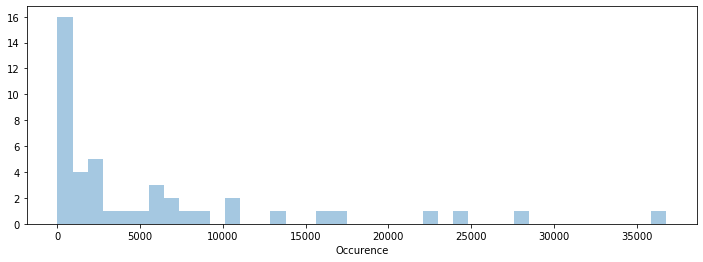

In [15]:
plt.figure(figsize=(12,4))
sns.distplot(dfclass['Occurence'],kde=False,bins=40)

In [16]:
words = [item for sublist in Xdata for item in sublist]

In [17]:
len(words)

259104

In [18]:
set_words = set(words) 

In [19]:
len(set_words)

21589

In [20]:
wordsOccurence = {}
for item in Xdata:
    for j in item:
        if j in wordsOccurence.keys():
            wordsOccurence[j] += 1
        else:
            wordsOccurence[j] = 1

In [21]:
dfwords = pd.DataFrame.from_dict(wordsOccurence, orient='index',columns=['Occurence'])

In [22]:
dfwords.head()

,Occurence
Confidence,1
in,4144
the,11278
pound,15
is,1714
